<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Time_series_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New extended hemispheric sunspot numbers


<img src="https://drive.google.com/uc?export=download&id=17ks2_EZdf9loAqjiQg9L-GV4lPoNuLgo" width="40%">

#Task1

Download and load the monthly data!

hint: https://www.sidc.be/silso/newdataset

In [1]:
!wget -O sunspot.csv http://www.sidc.be/silso/INFO/snmtotcsv.php

--2024-01-05 12:30:02--  http://www.sidc.be/silso/INFO/snmtotcsv.php
Resolving www.sidc.be (www.sidc.be)... 193.190.230.16
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.sidc.be/silso/INFO/snmtotcsv.php [following]
--2024-01-05 12:30:04--  https://www.sidc.be/silso/INFO/snmtotcsv.php
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.sidc.be/SILSO/INFO/snmtotcsv.php [following]
--2024-01-05 12:30:06--  https://www.sidc.be/SILSO/INFO/snmtotcsv.php
Reusing existing connection to www.sidc.be:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘sunspot.csv’

sunspot.csv             [  <=>               ] 122.46K   450KB/s    in 0.3s    

2024-01-05 12:30:07 (450 KB/s) - ‘sunspot.csv’ saved [125400]



In [26]:
import pandas as pd

df = pd.read_csv('sunspot.csv',sep=';',header=None)
df.head()

,0,1,2,3,4,5,6
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [27]:
df['date'] = df[0].astype(str) + '-' + df[1].astype(str)
df['date'] = df.date.astype('datetime64[ns]')
df.drop(columns=[0,1,2,4,5,6],inplace = True)
df = df.set_index('date')
df.rename(columns={3:'sunspots'},inplace=True)
df

,sunspots
date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2023-08-01,114.8
2023-09-01,133.6
2023-10-01,99.4


#Task 2

Perform "exploratory" analysis on the data, using descriptors and graphs to present its main features!

In [11]:
df.describe()

,0,1,2,3,4,5,6
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,1886.000000,6.500000,1886.497992,81.772879,5.637515,116.803939,0.998182
std,79.397168,3.452576,79.397664,67.665851,5.288847,248.443389,0.042608
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000,0.000000
25%,1817.000000,3.750000,1817.769250,24.100000,-1.000000,-1.000000,1.000000
50%,1886.000000,6.500000,1886.496500,67.550000,5.400000,30.000000,1.000000
75%,1955.000000,9.250000,1955.225000,122.400000,9.425000,31.000000,1.000000
max,2023.000000,12.000000,2023.958000,398.200000,29.400000,1587.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3300 non-null   int64  
 1   1       3300 non-null   int64  
 2   2       3300 non-null   float64
 3   3       3300 non-null   float64
 4   4       3300 non-null   float64
 5   5       3300 non-null   int64  
 6   6       3300 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 180.6 KB


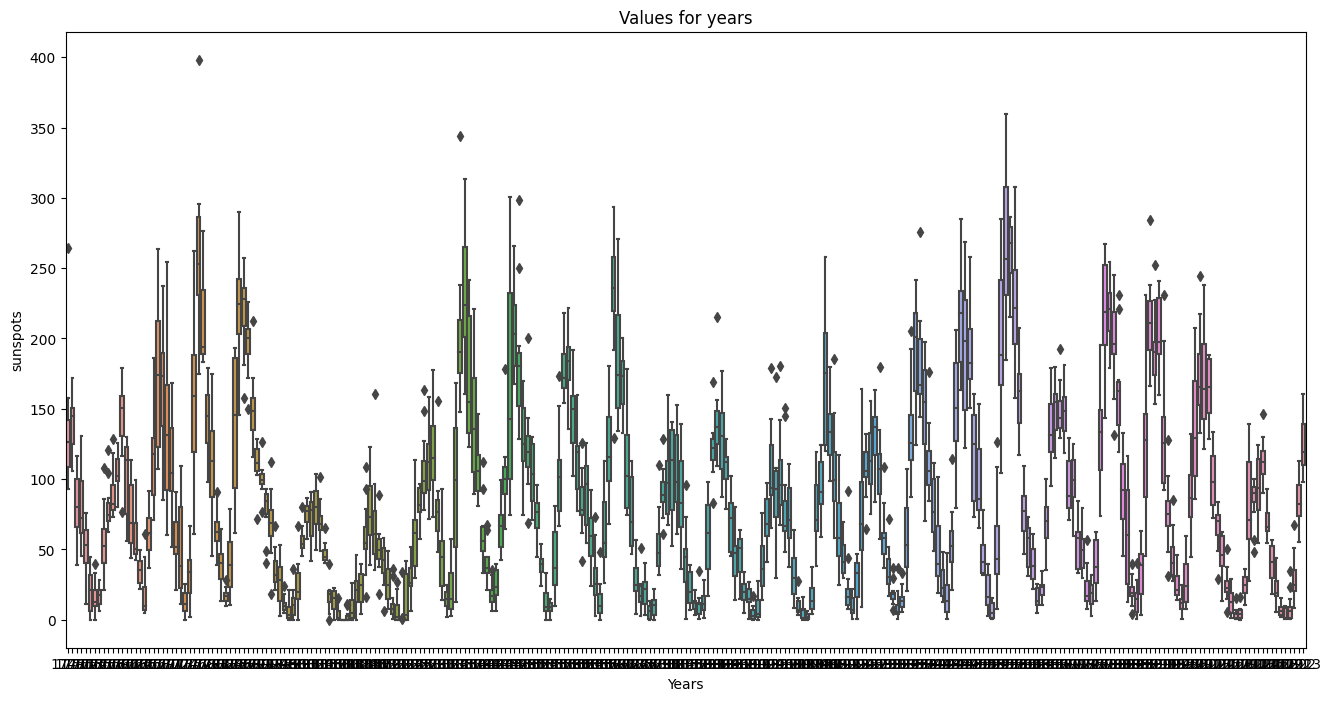

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 8))

sns.boxplot(x=df.index.year, y=df.sunspots)
plt.title("Values for years")
plt.xlabel("Years")
plt.show()

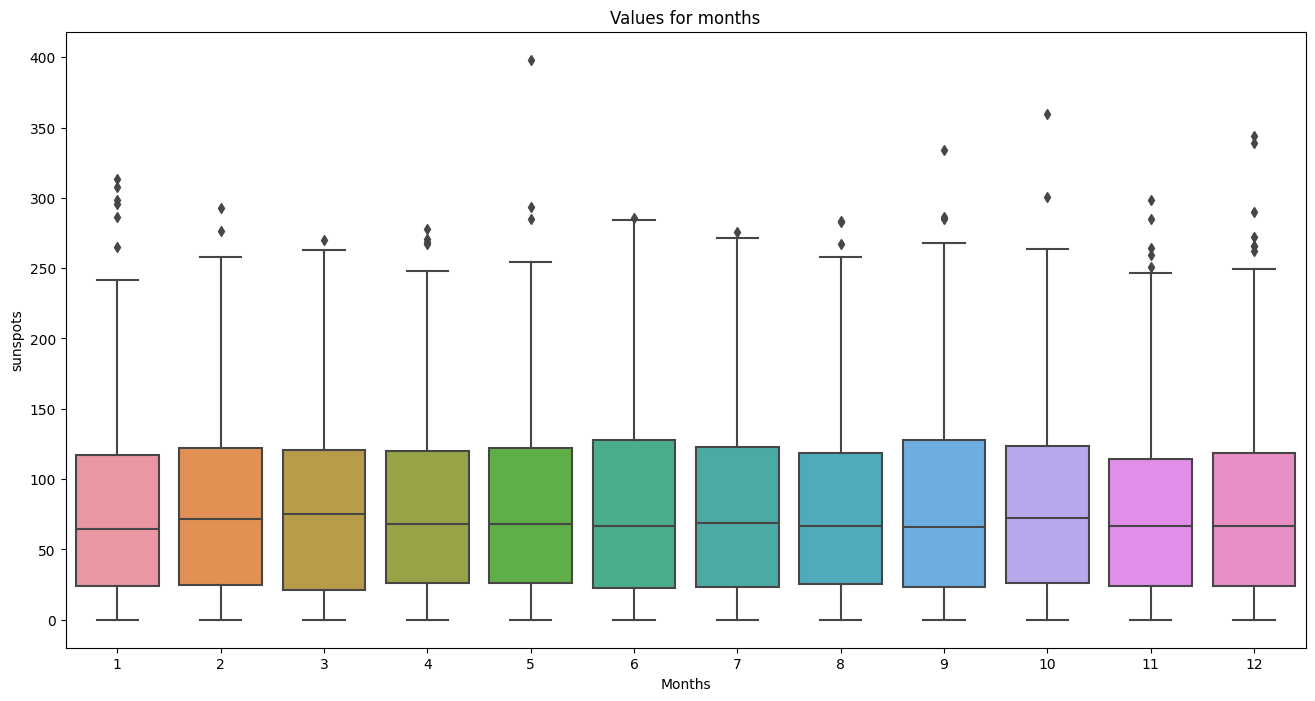

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 8))

sns.boxplot(x=df.index.month, y=df.sunspots)
plt.title("Values for months")
plt.xlabel("Months")
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["sunspots"].values)

print(f'p-value (probability of H0=there being unit root): {result[1]:.5f}')

p-value (probability of H0=there being unit root): 0.00000


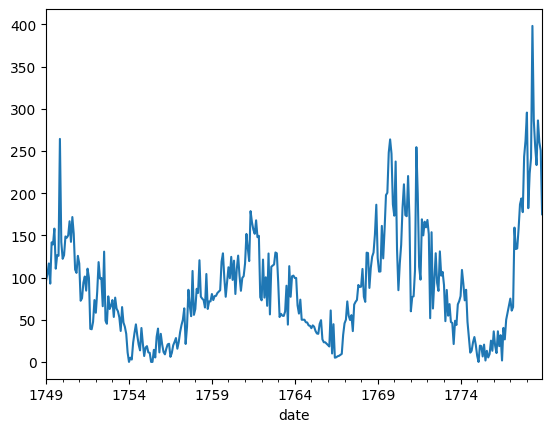

In [33]:
df['sunspots'].iloc[:30*12].plot();

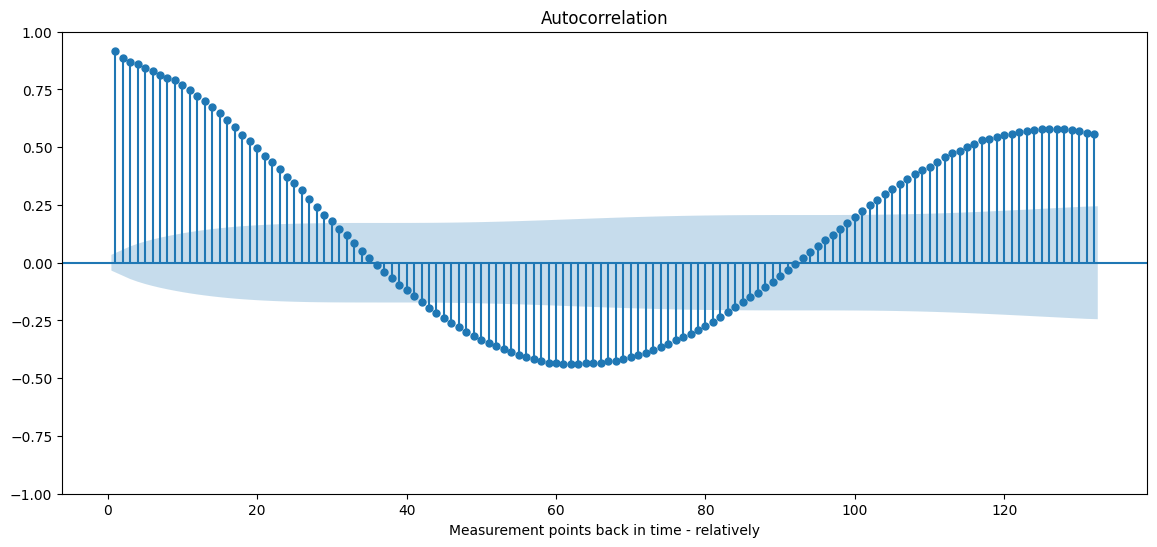

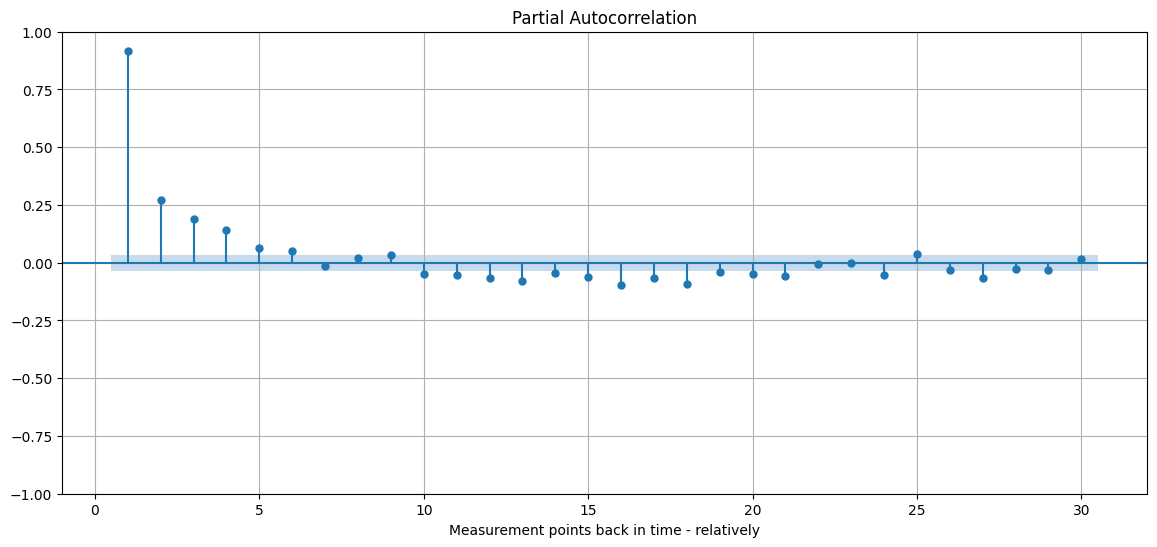

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(14,6))
plot_acf(df["sunspots"], zero=False, lags=11*12, ax=ax)
plt.xlabel("Measurement points back in time - relatively")
plt.show()

fig, ax = plt.subplots(figsize=(14,6))
plot_pacf(df["sunspots"], zero=False, lags=30, ax=ax)
plt.grid()
plt.xlabel("Measurement points back in time - relatively")
plt.show()

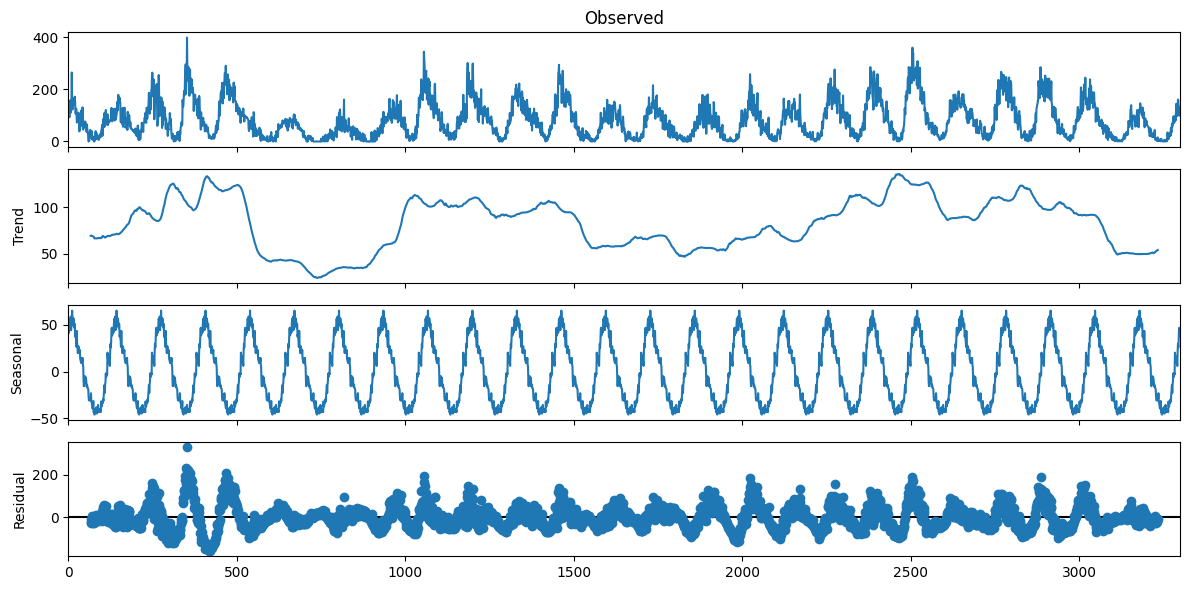

In [36]:
from statsmodels.tsa.seasonal import  seasonal_decompose
import matplotlib as mpl

with mpl.rc_context():
    mpl.rc("figure", figsize=(12,6))

    analysis = seasonal_decompose(df["sunspots"].values,model="additive", period=11*12)

    analysis.plot()
    plt.show()

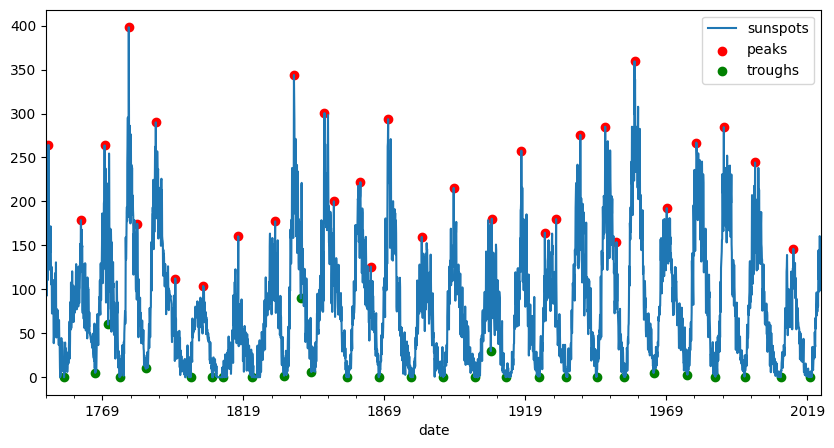

In [37]:
from scipy.signal import find_peaks

peak_idxs, peak_properties = find_peaks(df["sunspots"], prominence=80, distance=12*3)
low_idxs, low_properties = find_peaks(df["sunspots"]*-1, prominence=120, distance=12*3)

fig, ax = plt.subplots(figsize=(10,5))
df["sunspots"].plot(ax=ax)
ax.scatter(df.iloc[peak_idxs].index, df.iloc[peak_idxs]["sunspots"], c="red", label="peaks")
ax.scatter(df.iloc[low_idxs].index, df.iloc[low_idxs]["sunspots"], c="green", label="troughs")
plt.legend()
plt.show()

# Task 3

Split the data, for the modeling.

In [39]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df[['sunspots']], test_size=0.05 , shuffle=False)

# Task 4

Fit a basic linear regression model on the data.

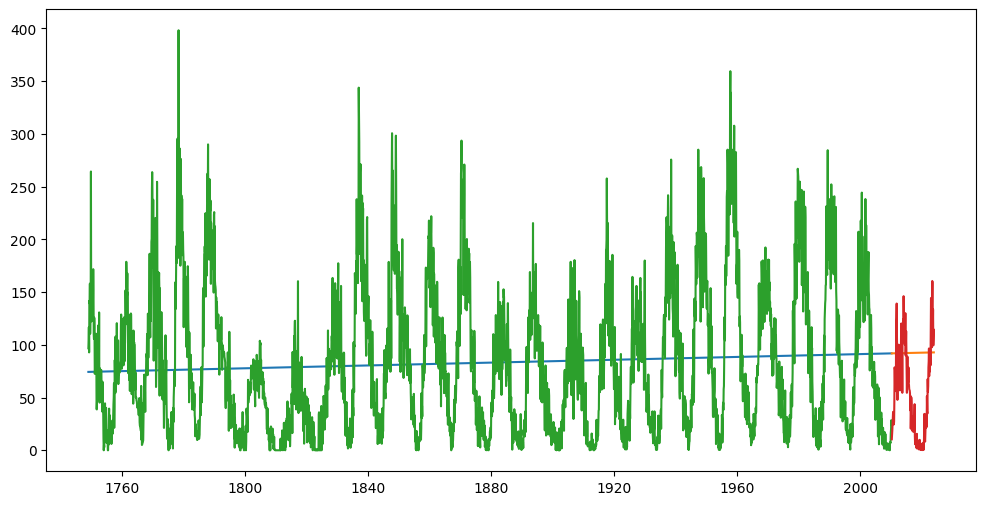

In [41]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(train_data.index.astype('int64').values.reshape(-1,1),train_data['sunspots'].values)

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index = train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["sunspots"])
plt.plot(test_data["sunspots"])
plt.show()

# Task 5

Use an autoregressive model for forecasting, evaluate its performance! (ARIMA)

Note: using tqdm is an elegant thing, it automatically generates a progressbar based on the cycle ...

In [42]:
## you can use trange instead of range to be able to monitor progress
from tqdm.notebook import trange

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

history = [x for x in list(train_data["sunspots"].values.astype("float"))]
predictions = list()

print("Prediction with ARIMA:\n")

# Step by step we walked around the testset
for t in trange(len(list(test_data["sunspots"].values.astype("float")))):
    # Model initialize
    model = ARIMA(history, order=(5,0,0))
    model_fit = model.fit()
    # Prediction a time period
    output = model_fit.forecast()
    # Collecting
    yhat = output[0]
    predictions.append(yhat)

    # One step further
    obs = list(test_data["sunspots"].values.astype("float"))[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Prediction with ARIMA:



  0%|          | 0/165 [00:00<?, ?it/s]


Mean abs error: 11.971991678823093
Explained variance: 0.855478158406981


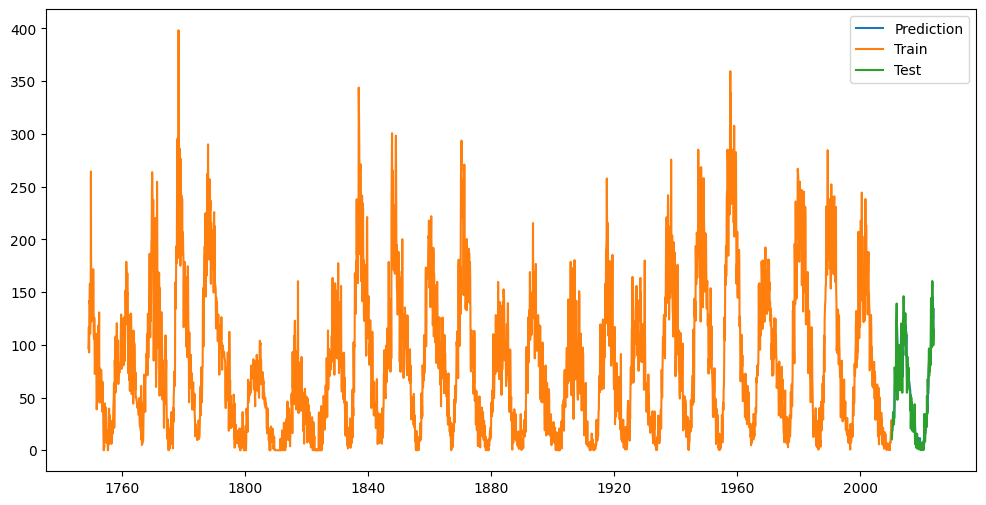

In [43]:
import numpy as np
from sklearn.metrics import mean_absolute_error, explained_variance_score
# Error analysis

errors = np.array(test_data["sunspots"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["sunspots"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["sunspots"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["sunspots"], label="Train")

plt.plot(test_data["sunspots"], label="Test")
plt.legend()
plt.show()

# Task 6

Apply complex modeling method, maximize predictive performance!

“Make a rolling window after shifting the variable by 1 to have X and y” is a very frustrating activity by manually. This should not be done manually, not least because of possible sources of error.

This is where seglearn comes into, which does it all for us.

In [44]:
!pip install seglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 21.1 MB/s eta 0:00:00


In [45]:
TIME_WINDOW=30
FORECAST_DISTANCE=1

In [46]:
from seglearn.transform import SegmentXYForecast, last

In [47]:
## supply the code
segmenter = SegmentXYForecast(width=TIME_WINDOW, step=1, y_func=last, forecast=FORECAST_DISTANCE)
X_train_rolled, y_train_rolled, _ = segmenter.fit_transform([train_data.sunspots],[train_data.sunspots])

## to check that at least the first sample was correctly created:
assert X_train_rolled[1,-1] == y_train_rolled[0]

In [48]:
from sklearn.ensemble import RandomForestRegressor

N_ESTIMATORS = 30
RANDOM_STATE = 452543634

In [49]:
## instantiate and train model
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=N_ESTIMATORS, n_jobs=-1)


rf.fit(X_train_rolled,y_train_rolled)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=452543634)

In [51]:
from sklearn import metrics

## create sliding window test input and target
X_test_rolled, y_test_rolled,_ = segmenter.fit_transform([test_data.sunspots],[test_data.sunspots])

## get predictions for test set
RF_model_predictions = rf.predict(X_test_rolled)

## print out some metrics
print()
print("Mean abs error:", mean_absolute_error(y_test_rolled,RF_model_predictions))
print("Explained variance:", explained_variance_score(y_test_rolled,RF_model_predictions))


Mean abs error: 11.854839506172839
Explained variance: 0.8670645949900203
